## Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn import metrics as metrics

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import string


In [2]:
files = [f for f in os.listdir('./data/press_releases/') if 'csv' in f]

In [3]:
df = pd.DataFrame()

for file in files:
    new = pd.read_csv(f'./data/press_releases/{file}')
    df = pd.concat([df,new],ignore_index=True)

df

,full_link,time,title,body,html,full_text,year,label
0,https://www.apple.com/newsroom/2021/03/apple-w...,2021-03-01,Apple Women’s Health Study releases preliminar...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGlobal N...,"<!DOCTYPE html>\n<html class=""no-js"" dir=""ltr""...",Apple Women’s Health Study releases preliminar...,2021.0,after
1,https://www.apple.com/newsroom/2021/03/apple-t...,2021-03-01,Apple TV+ announces programming partnership wi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGlobal N...,"<!DOCTYPE html>\n<html class=""no-js"" dir=""ltr""...",Apple TV+ announces programming partnership wi...,2021.0,after
2,https://www.apple.com/newsroom/2021/03/apple-h...,2021-03-01,Apple Hearing Study shares new insights on hea...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGlobal N...,"<!DOCTYPE html>\n<html class=""no-js"" dir=""ltr""...",Apple Hearing Study shares new insights on hea...,2021.0,after
3,https://www.apple.com/newsroom/2021/03/new-zea...,2021-03-01,New Zealand students prototype their own Samoa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGlobal N...,"<!DOCTYPE html>\n<html class=""no-js"" dir=""ltr""...",New Zealand students prototype their own Samoa...,2021.0,after
4,https://www.apple.com/newsroom/2021/02/apple-c...,2021-02-01,Apple celebrates Women’s History Month and Int...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGlobal N...,"<!DOCTYPE html>\n<html class=""no-js"" dir=""ltr""...",Apple celebrates Women’s History Month and Int...,2021.0,after
...,...,...,...,...,...,...,...,...
1564,https://press.aboutamazon.com/news-releases/ne...,2021-01-19 00:00:00,Amazon.com to Webcast Fourth Quarter 2020 Fina...,\n\n\n\n\n\n\n\n Skip to main navigatio...,"<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"" pre...",Amazon.com to Webcast Fourth Quarter 2020 Fina...,2021.0,after
1565,https://press.aboutamazon.com/news-releases/ne...,2021-01-19 00:00:00,Amazon Teams Up with Pharrell Williams’ YELLOW...,\n\n\n\n\n\n\n\n Skip to main navigatio...,"<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"" pre...",Amazon Teams Up with Pharrell Williams’ YELLOW...,2021.0,after
1566,https://press.aboutamazon.com/news-releases/ne...,2021-01-11 00:00:00,"Amazon Expands Investment in Metro Detroit, Cr...",\n\n\n\n\n\n\n\n Skip to main navigatio...,"<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"" pre...","Amazon Expands Investment in Metro Detroit, Cr...",2021.0,after
1567,https://press.aboutamazon.com/news-releases/ne...,2021-01-06 00:00:00,Amazon Launches $2 Billion Housing Equity Fund...,\n\n\n\n\n\n\n\n Skip to main navigatio...,"<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"" pre...",Amazon Launches $2 Billion Housing Equity Fund...,2021.0,after


In [4]:
df.label.value_counts(normalize=True)

# baseline is .618228

before    0.618228
after     0.381772
Name: label, dtype: float64

## Vectorizing

In [24]:
X = df['full_text']  # the features we want to analyze
y = df['label']  # the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=47,
                                                    stratify=y)

In [25]:
# https://python.plainenglish.io/text-classification-using-python-spacy-7a414abcc83a


# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors


# Creating our tokenizer function
def spacy_tokenizer(text):
    # Creating our token object, which is used to create
    # documents with linguistic annotations.
    mytokens = nlp(text)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]

    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

    # return preprocessed list of tokens
    return mytokens


# Custom transformer using spaCy

class predictors(TransformerMixin): 
    
    def transform(self, X, **transform_params):
        # Basic function to clean the text
        def clean_text(text):
            # Removing spaces and converting text into lowercase
            return text.strip().lower()
        
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, max_features=2000)

In [14]:
tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, max_features=2000)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

## Logistic Regression

In [26]:
# Logistic Regression Classifier - penalty: 'l2'

logr_l2 = LogisticRegression(penalty='l2')

pipe_l2 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('logr_l2', logr_l2)])

# model generation
pipe_l2.fit(X_train,y_train)
print('Train:', pipe_l2.score(X_train,y_train))
print('Test:', pipe_l2.score(X_test,y_test))

# baseline is .618228

# Train: 0.8743169398907104
# Test: 0.7834394904458599

Train: 0.8743169398907104
Test: 0.7834394904458599


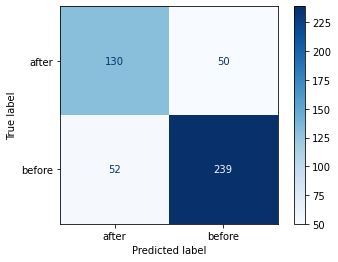

In [27]:
metrics.plot_confusion_matrix(pipe_l2, X_test, y_test, cmap='Blues', 
                              values_format='d');

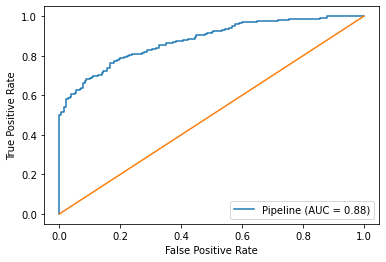

In [28]:
# ROC curve
metrics.plot_roc_curve(pipe_l2, X_test, y_test)
# add worst case scenario line
plt.plot([0, 1], [0, 1])

In [30]:
metrics.roc_auc_score(y_test, pipe_l2.predict_proba(X_test)[:,1])

0.8782550591828943

In [31]:
# Logistic Regression Classifier - penalty: 'none'

logr_none = LogisticRegression(penalty='none')

pipe_none = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('logr_none', logr_none)])

# model generation
pipe_none.fit(X_train,y_train)
print('Train:', pipe_none.score(X_train,y_train))
print('Test:', pipe_none.score(X_test,y_test))

# baseline is .618228

# Train: 1.0
# Test: 0.8535031847133758

Train: 1.0
Test: 0.8535031847133758


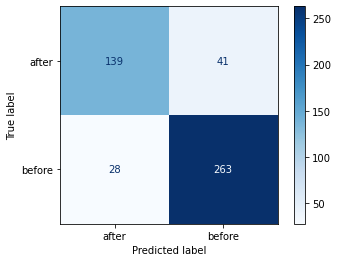

In [32]:
metrics.plot_confusion_matrix(pipe_none, X_test, y_test, cmap='Blues', 
                              values_format='d');

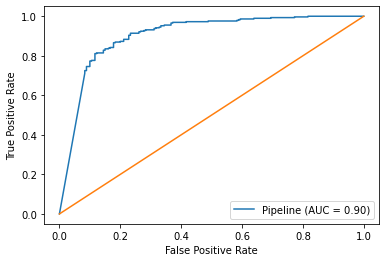

In [33]:
# ROC curve
metrics.plot_roc_curve(pipe_none, X_test, y_test)
# add worst case scenario line
plt.plot([0, 1], [0, 1])

In [34]:
metrics.roc_auc_score(y_test, pipe_none.predict_proba(X_test)[:,1])

0.9040759831996945

## KNN

In [35]:
# KNN Classifier - Neighbors = 8

knn8 = KNeighborsClassifier(n_neighbors=8,n_jobs=-1)

pipen8 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('knn', knn8)])

# model generation
pipen8.fit(X_train,y_train)
print('Train:', pipen8.score(X_train,y_train))
print('Test:', pipen8.score(X_test,y_test))

# baseline is .618228

# Train: 0.7996357012750456
# Test: 0.7643312101910829

Train: 0.7996357012750456
Test: 0.7643312101910829


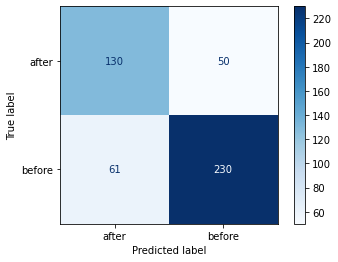

In [36]:
metrics.plot_confusion_matrix(pipen8, X_test, y_test, cmap='Blues', 
                              values_format='d');

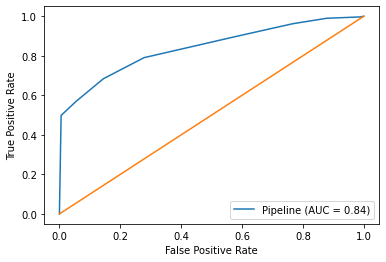

In [37]:
# ROC curve
metrics.plot_roc_curve(pipen8, X_test, y_test)
# add worst case scenario line
plt.plot([0, 1], [0, 1])

In [38]:
metrics.roc_auc_score(y_test, pipen8.predict_proba(X_test)[:,1])

0.8406834669721267

In [ ]:
# KNN Classifier - Neighbors = 5

knn5 = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

pipen5 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('knn', knn5)])

# model generation
pipen5.fit(X_train,y_train)
print('Train:', pipen5.score(X_train,y_train))
print('Test:', pipen5.score(X_test,y_test))

# baseline is .618228

# Train: 0.8187613843351548
# Test: 0.7473460721868365

In [ ]:
metrics.plot_confusion_matrix(pipen5, X_test, y_test, cmap='Blues', 
                              values_format='d');

In [ ]:
# ROC curve
metrics.plot_roc_curve(pipen5, X_test, y_test)
# add worst case scenario line
plt.plot([0, 1], [0, 1])

In [ ]:
metrics.roc_auc_score(y_test, pipen5.predict_proba(X_test)[:,1])

In [ ]:
# KNN Classifier - Neighbors = 3

knn3 = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

pipen3 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('knn', knn3)])

# model generation
pipen3.fit(X_train,y_train)
print('Train:', pipen3.score(X_train,y_train))
print('Test:', pipen3.score(X_test,y_test))

# baseline is .618228

# Train: 0.8588342440801457
# Test: 0.7303609341825902

In [ ]:
metrics.plot_confusion_matrix(pipen3, X_test, y_test, cmap='Blues', 
                              values_format='d');

In [ ]:
# ROC curve
metrics.plot_roc_curve(pipen3, X_test, y_test)
# add worst case scenario line
plt.plot([0, 1], [0, 1])

In [ ]:
metrics.roc_auc_score(y_test, pipen3.predict_proba(X_test)[:,1])